In [1]:
from proximitylib import *

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"

In [3]:
comp_dis = pickle.load(open("comp_dis.p","rb"))

In [10]:
L = Fibonacci[9]
wt = 0.2
LSC = 199

100%|██████████| 500/500 [25:20<00:00,  2.91s/it]


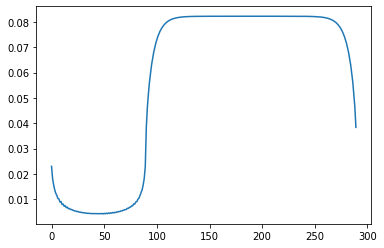

In [11]:
N_trials = 500
Actual_Delta_mids = []

Deltas = []
for i in tqdm(range(N_trials)):
    chain = hybrid_ring (chain1D(L, wt =wt), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 4000)
    Deltas.append(np.real(chain.Delta))
    Actual_Delta_mids.append(np.real(chain.Delta[L//2]))

Delta_avg = np.sum(np.array(Deltas), axis = 0)/N_trials

plt.plot(Delta_avg)
plt.show()

In [13]:
stats.describe([Delta[L//2] for Delta in Deltas])

DescribeResult(nobs=500, minmax=(0.0009280894702509101, 0.015258806493716985), mean=0.004326202199830609, variance=4.094994122803563e-06, skewness=1.3890998426786894, kurtosis=3.210618051278953)

In [14]:
# comp_dis = pickle.load(open("comp_dis.p","rb"))
# comp_dis[(L,wt)] = Deltas
# comp_dis.keys()

dict_keys([(89, 0.15), (89, 0.25), (144, 0.25), (233, 0.25), (377, 0.25), (55, 0.25), (89, 0.2), (89, 0.1), (89, 0.05), (89, 0.3), (144, 0.05), (233, 0.05), (377, 0.05), (55, 0.05)])

In [264]:
# data = Actual_Delta_mids
# pickle.dump(data, open("dis89015.p","wb"))

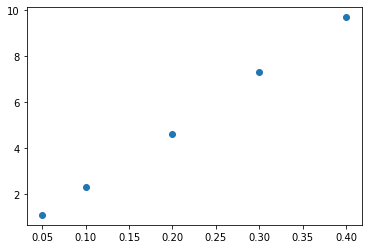

In [7]:
plt.plot([0.05,0.1, 0.2,0.3,0.4],[1.1,2.3,4.6,7.3,9.7],"o")

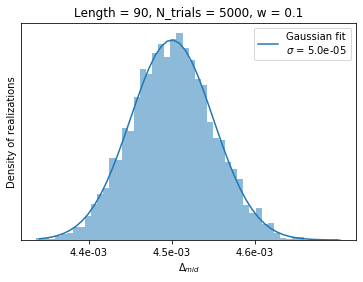

In [12]:
# If Gaussian
bins = 50

fig, ax = plt.subplots()

yy,xx, _ = ax.hist(data, histtype = "stepfilled", color = "C0", alpha = 0.5, bins = bins, density = True)
xx = (xx[:-1]+xx[1:])/2
ax.set_xlabel("$\Delta_{mid}$")
ax.set_ylabel("Density of realizations")
ax.set_title("Length = {}, N_trials = {}, w = {}".format(L+1,len(data),wt))
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False)

mod = lmf.models.GaussianModel()
pars = mod.guess(yy, x=xx)
gaussian_fit = mod.fit(yy ,pars, x=xx)
sigma = gaussian_fit.values["sigma"]
center = gaussian_fit.values["center"]

# plt.locator_params(nbins=5)
ax.set_xticks([center-2*sigma,center,center+2*sigma])
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1e'))

ax.plot(xx,gaussian_fit.best_fit, label = "Gaussian fit\n$\sigma$ = {:.1e}".format(sigma))
ax.legend()

Text(0.5, 1.0, 'Weak disorder')

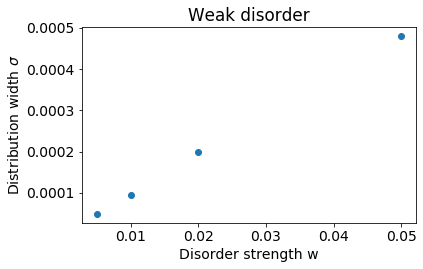

In [65]:
plt.plot([0.005, 0.01, 0.02, 0.05],[4.9e-5, 9.4e-5,2.0e-4, 4.8e-04],"o")
plt.xlabel("Disorder strength w")
plt.ylabel("Distribution width $\sigma$")
plt.title("Weak disorder")

In [2]:
data = pickle.load(open("dis8902.p", "rb"))

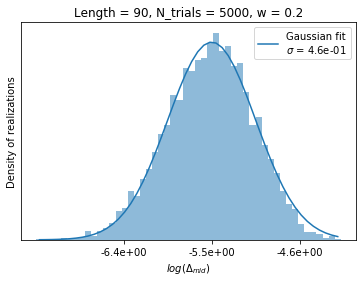

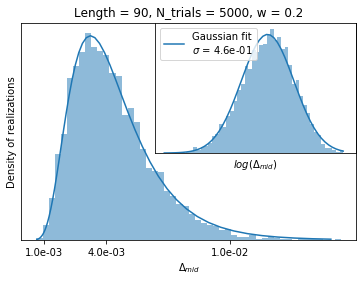

In [5]:
# If Log Normal
wt = 0.2
L = 89
bins = 50
log_data = np.log(data)

fig, ax = plt.subplots()

yy,xx, _ = ax.hist(log_data, histtype = "stepfilled", color = "C0", alpha = 0.5, bins = bins, density = True)
xx = (xx[:-1]+xx[1:])/2
ax.set_xlabel("$log(\Delta_{mid})$")
ax.set_ylabel("Density of realizations")
ax.set_title("Length = {}, N_trials = {}, w = {}".format(L+1,len(log_data),wt))
ax.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False)

mod = lmf.models.GaussianModel()
pars = mod.guess(yy, x=xx)
gaussian_fit = mod.fit(yy ,pars, x=xx)
sigma = gaussian_fit.values["sigma"]
center = gaussian_fit.values["center"]

ax.set_xticks([center-2*sigma,center,center+2*sigma])
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1e'))

ax.plot(xx,gaussian_fit.best_fit, label = "Gaussian fit\n$\sigma$ = {:.1e}".format(sigma))
ax.legend()
plt.show()


fig, ax = plt.subplots()

logyy, logxx = yy, xx

yy, xx, _ = ax.hist(data, histtype = "stepfilled", color = "C0", alpha = 0.5, bins = bins, density = True)
xx = (xx[:-1]+xx[1:])/2
ax.set_xlabel("$\Delta_{mid}$")
ax.set_ylabel("Density of realizations")
ax.set_title("Length = {}, N_trials = {}, w = {}".format(L+1,len(data),wt))
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False)

ax.plot(np.exp(logxx),gaussian_fit.best_fit*np.exp(-logxx), label = "Gaussian fit\n$\sigma$ = {:.1e}".format(sigma))
axin = ax.inset_axes([0.4,0.4,0.6,0.6])
_, xx, _ = axin.hist(log_data, histtype = "stepfilled", color = "C0", alpha = 0.5, bins = bins, density = True)
xx = xx[:-1]
axin.plot(xx,gaussian_fit.best_fit, label = "Gaussian fit\n$\sigma$ = {:.1e}".format(sigma))
axin.set_xlabel("$log(\Delta_{mid})$")
axin.tick_params(
    axis = "both",
    which = "both",
    left = False,
    labelleft = False,
    bottom = False,
    labelbottom = False
)
axin.legend()

sigma = gaussian_fit.values["sigma"]
center = gaussian_fit.values["center"]

ax.set_xticks([np.exp(center-3*sigma),np.exp(center),np.exp(center+2*sigma)])
ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1e'))

plt.show()


In [44]:
data005 = pickle.load(open("dis89005.p", "rb"))

In [ ]:
from scipy import stats

statts = [stats.describe(data) for data in datas]

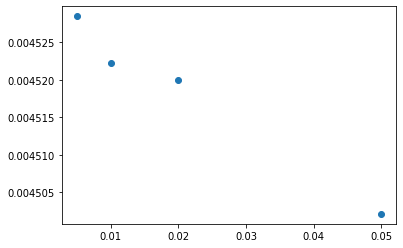

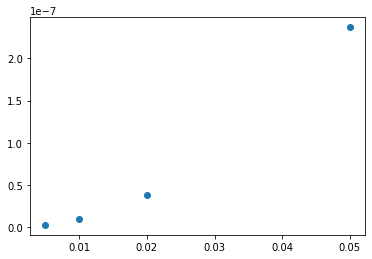

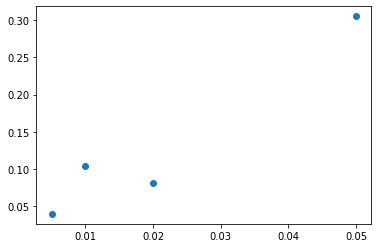

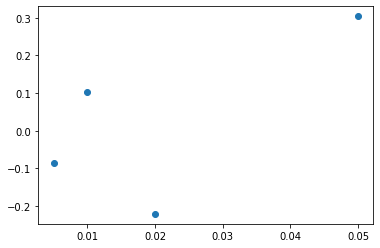

In [53]:
plt.plot(ws,[stat.mean  for stat in statts], "o")
plt.show()
plt.plot(ws,[stat.variance  for stat in statts], "o")
plt.show()


100%|██████████| 89/89 [05:29<00:00,  3.60s/it]


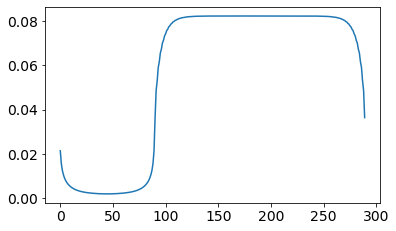

In [254]:
############### Fibonacci case
n = 9
L = Fibonacci[n]
w = 0.25
N_trials = L
Actual_Delta_mids = []


Deltas = {}
for i in tqdm(range(N_trials)):
    chain = hybrid_ring (chainFC(n, w = w, phi = i), chain1D(LSC,u = 0.75,v=-1.5), t_int = -1, beta = 2000)
    Deltas[2*np.pi*i/N_trials] = np.real(chain.Delta)
    Actual_Delta_mids.append(np.real(chain.Delta[L//2]))

Delta_avg = np.ones(L+1+1+LSC)
for Delta in Deltas.values():
    Delta_avg *= Delta**(1/N_trials)

plt.plot(Delta_avg)
plt.show()

In [258]:
comp_FC[(L,w)] = Deltas

In [6]:
ll = 233
Delta_mids = {}
for (l, w),Deltas in comp_FC.items():
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas.values()]

Text(0.5, 1.0, 'Statistics of $\\Delta$_mid vs modulation strength\n (Length = 233)')

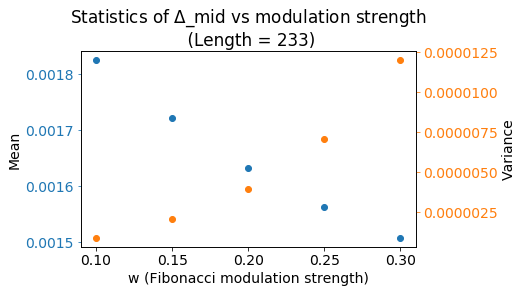

In [274]:
stat_w = {}
ws = sorted(Delta_mids.keys())
for w in ws:
    stat_w[w] = stats.describe(Delta_mids[w])
    
fig, ax1 = plt.subplots()

ax1.plot(list(ws),[stat_w[w].mean for w in ws],"C0o")

ax2 = ax1.twinx()

ax2.plot(list(ws),[stat_w[w].variance for w in ws],"C1o")



ax1.set_xlabel("w (Fibonacci modulation strength)")

ax1.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C1')
ax1.set_ylabel("Mean")
ax2.set_ylabel("Variance")

ax2.set_title("Statistics of $\Delta$_mid vs modulation strength\n (Length = {})".format(ll))

(array([0.08434681, 0.        , 0.08434681, 0.25304043, 0.16869362,
        0.50608086, 0.08434681, 0.50608086, 0.33738724, 0.        ,
        0.25304043, 0.33738724, 0.59042767, 0.7591213 , 0.92781492,
        0.67477449, 0.50608086, 0.42173405, 0.92781492, 0.84346811,
        0.7591213 , 1.26520216, 0.59042767, 0.7591213 , 0.33738724,
        0.08434681, 1.09650854, 1.51824259, 0.7591213 , 0.42173405,
        0.7591213 , 0.08434681, 0.25304043, 0.16869362, 0.67477449,
        0.50608086, 0.25304043, 0.16869362, 0.        , 0.25304043,
        0.16869362, 0.08434681, 0.25304043, 0.        , 0.08434681,
        0.        , 0.        , 0.        , 0.        , 0.08434681]),
 array([-7.54565072, -7.49476741, -7.44388409, -7.39300077, -7.34211746,
        -7.29123414, -7.24035082, -7.18946751, -7.13858419, -7.08770087,
        -7.03681756, -6.98593424, -6.93505092, -6.88416761, -6.83328429,
        -6.78240097, -6.73151766, -6.68063434, -6.62975102, -6.5788677 ,
        -6.52798439, -6.47

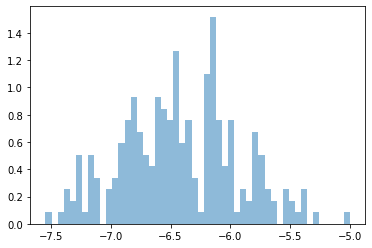

In [9]:
plt.hist(np.log(Delta_mids[0.1]), bins = 50, alpha = 0.5, density = True)
# plt.hist(Delta_mids[0.2], bins = 50, alpha = 0.5, density = True)
# plt.hist(Delta_mids[0.3], bins = 50, alpha = 0.5, density = True)
# plt.axvline(stat_w[0.1].mean)
# plt.axvline(stat_w[0.2].mean, color = "C1")
# plt.axvline(stat_w[0.3].mean, color = "C2")

In [261]:
pickle.dump(comp_FC,open("comp_FC.p","wb"))

In [2]:
comp_FC = pickle.load(open("comp_FC.p", "rb"))

In [5]:
Deltas = comp_FC[(233,0.1)].values()

In [8]:
Delta_mids[0.1]

[0.0015864227527863386,
 0.002300026251668159,
 0.003048637140949891,
 0.0020975049213296563,
 0.00166905065177838,
 0.0021471872349099535,
 0.0015665578431029697,
 0.0011558018137763964,
 0.0013316095340304124,
 0.0021155257269646725,
 0.0013941102278190777,
 0.0015465394063307212,
 0.002509695104189187,
 0.002291386152729851,
 0.0029128278463872994,
 0.004380011312467267,
 0.0034108775629831606,
 0.002381521128571481,
 0.0032055395842202792,
 0.002140216672606035,
 0.0017716352088958044,
 0.0022819369882453905,
 0.003371268863757888,
 0.0025380773752762546,
 0.003025567434880659,
 0.004585978425866409,
 0.003615906690594366,
 0.005080104778973648,
 0.0067279493633172005,
 0.004631325508216818,
 0.003910469034573255,
 0.004054596033539938,
 0.0025268919530552648,
 0.0032948495777780176,
 0.0032948495777780176,
 0.0020802244978547603,
 0.001767330063412084,
 0.0023315604084877773,
 0.0032343578891188517,
 0.0021318185540897226,
 0.003310151967971863,
 0.003894572557281843,
 0.002434425